<a href="https://colab.research.google.com/github/idarapatrick/Math-for-ML-Summative/blob/main/ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Hypertension Prevalence in Africa

## Use Case: Predicting Hypertension Risk in African Adults Using Linear Regression

### MISSION
My mission is to predict individual hypertension risk across African populations in order to support early intervention, guide personalized healthcare, and empower individuals to make informed decisions about their health, ultimately helping to reduce hypertension prevalence across the continent.

### PROBLEM STATEMENT
Many individuals in African countries remain unaware of their hypertension risk until they are formally diagnosed, often missing opportunities for early intervention and preventive care. WHO STEPS data from 17 sub-Saharan African countries shows that fewer than 20% of people with hypertension are aware of their condition (Ataklte et al., 2015), with Nigeria reporting awareness levels as low as 29% (Adeloye et al., 2021). Demographic factors such as age, sex, and geographic region have been consistently shown to be strong predictors of hypertension. For instance, prevalence increases dramatically with age in countries like Tanzania, while urban residency and certain regional or ethnic backgrounds also influence risk across West and Central Africa. In response, researchers have begun developing predictive models to identify individuals at risk before diagnosis. Tools like South Africa’s 6-variable hypertension score and the SIREN model in West Africa have demonstrated that simple demographic and lifestyle variables can effectively predict risk and support targeted screening efforts.

In this project, we will apply linear regression to build a predictive model using relevant features: age, sex, and country, to estimate an individual’s probability of having or developing hypertension. The model will support healthcare workers in prioritizing screening in under-resourced communities by identifying those most likely to benefit from early intervention.


Data source = [Access it here](https://ncdrisc.org/data-downloads-hypertension.html)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import pydantic
import seaborn as sns

In [3]:
data = pd.read_csv('hypertension_by_country.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'hypertension_by_country.csv'

In [ ]:
data = pd.read_csv('hypertension_by_country.csv')
data.head(10)

,Country,ISO,Sex,Year,Age,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1990,30-34,0.165057,0.054998,0.328547,0.143767,0.028435,0.346648,0.076752,0.007690,0.245869,0.026399,0.000521,0.126582,0.139662,0.030463,0.323982
1,Afghanistan,AFG,Men,1991,30-34,0.165736,0.058951,0.323105,0.147411,0.032055,0.345665,0.079386,0.009157,0.242824,0.027067,0.000685,0.122848,0.139061,0.033116,0.313423
2,Afghanistan,AFG,Men,1992,30-34,0.166542,0.062542,0.317404,0.151274,0.034928,0.341594,0.082272,0.010863,0.241916,0.027932,0.000918,0.122813,0.138595,0.035562,0.306124
3,Afghanistan,AFG,Men,1993,30-34,0.167442,0.065775,0.311310,0.155346,0.039550,0.341578,0.085406,0.012729,0.242215,0.029013,0.001231,0.120542,0.138279,0.038230,0.298856
4,Afghanistan,AFG,Men,1994,30-34,0.168342,0.069399,0.306430,0.159588,0.042900,0.345305,0.088812,0.015081,0.241365,0.030322,0.001609,0.120133,0.138088,0.041444,0.290221
5,Afghanistan,AFG,Men,1995,30-34,0.169319,0.073816,0.301810,0.164077,0.047182,0.347119,0.092517,0.017269,0.242455,0.031874,0.001990,0.119922,0.137995,0.043696,0.280930
6,Afghanistan,AFG,Men,1996,30-34,0.170371,0.077953,0.298707,0.168801,0.051343,0.348413,0.096500,0.019685,0.243977,0.033632,0.002450,0.121606,0.138012,0.046074,0.273735
7,Afghanistan,AFG,Men,1997,30-34,0.171504,0.081172,0.296471,0.173692,0.054930,0.349604,0.100772,0.021847,0.243892,0.035624,0.003053,0.123096,0.138124,0.048500,0.268990
8,Afghanistan,AFG,Men,1998,30-34,0.172730,0.083615,0.295718,0.178776,0.059639,0.354349,0.105275,0.024875,0.246637,0.037808,0.003782,0.124942,0.138366,0.050455,0.265569
9,Afghanistan,AFG,Men,1999,30-34,0.174059,0.086176,0.294402,0.184009,0.063809,0.357559,0.110032,0.027711,0.249529,0.040180,0.004684,0.127124,0.138668,0.052406,0.261777


**Before we proceed, we need to get rows that contain only the African countries.**

In [ ]:
countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
    "Democratic Republic of the Congo", "Republic of the Congo", "Côte d'Ivoire",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho",
    "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
    "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia",
    "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
    "Uganda", "Zambia", "Zimbabwe"
]

# filter dataset to get only African countries from year 2015 and above
data = data[
    (data['Country'].isin(countries)) &
    (data['Year'] >= 2015)
].reset_index(drop=True)

# store the dataset with African countries in a csv
data.to_csv('africa.csv', index=False)

data.head(20)


,Country,ISO,Sex,Year,Age,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval
0,Algeria,DZA,Men,2015,30-34,0.144679,0.093552,0.205134,0.101204,0.049887,0.172089,0.043048,0.015970,0.084392,0.023246,0.006344,0.053541,0.108989,0.060932,0.172765
1,Algeria,DZA,Men,2016,30-34,0.144689,0.091982,0.207997,0.104098,0.050732,0.178369,0.042942,0.015357,0.085947,0.023600,0.006167,0.055147,0.108785,0.058701,0.175243
2,Algeria,DZA,Men,2017,30-34,0.145186,0.090476,0.212175,0.106575,0.050295,0.185610,0.042469,0.014654,0.088054,0.023646,0.005622,0.057971,0.108933,0.056719,0.178935
3,Algeria,DZA,Men,2018,30-34,0.145507,0.087994,0.217352,0.109121,0.049116,0.193926,0.042066,0.013576,0.089300,0.023921,0.005052,0.061549,0.109156,0.054272,0.184375
4,Algeria,DZA,Men,2019,30-34,0.145954,0.085348,0.224042,0.111822,0.047612,0.205890,0.041771,0.012291,0.092562,0.024349,0.004453,0.066378,0.109495,0.051049,0.190392
5,Angola,AGO,Men,2015,30-34,0.189962,0.094234,0.313598,0.200262,0.073757,0.382537,0.099924,0.025907,0.237023,0.053385,0.007886,0.158956,0.209347,0.091462,0.362664
6,Angola,AGO,Men,2016,30-34,0.187381,0.089975,0.317168,0.209106,0.075927,0.401374,0.105925,0.026466,0.253414,0.058570,0.008061,0.177896,0.209194,0.088356,0.368628
7,Angola,AGO,Men,2017,30-34,0.184991,0.084965,0.322943,0.218192,0.078030,0.419301,0.112213,0.027411,0.266996,0.064213,0.007974,0.200269,0.209210,0.083441,0.377953
8,Angola,AGO,Men,2018,30-34,0.182701,0.079203,0.327579,0.227517,0.079005,0.440866,0.118870,0.027560,0.286268,0.070508,0.007906,0.227121,0.209349,0.079315,0.388771
9,Angola,AGO,Men,2019,30-34,0.180592,0.073897,0.334847,0.237119,0.079836,0.465331,0.125903,0.027685,0.306722,0.077468,0.007569,0.253483,0.209637,0.075012,0.399259


# Data Exploration

We will start by exploring our data to understand what rows need to be dropped, what rows to convert to numerical data, null values, etc.

In [ ]:
print("Data Info: \n", data.info())
print("Data Description: \n", data.describe())
print("Data Columns: \n", data.columns)
print("Data Columns Unique: \n", data.columns.unique())
 # Show first 10 unique values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 entries, 0 to 4134
Data columns (total 20 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Country                                                                                             4135 non-null   object 
 1   ISO                                                                                                 4135 non-null   object 
 2   Sex                                                                                                 4135 non-null   object 
 3   Year                                                                                                4135 non-null   int64  
 4   Age                                                                                                 4135 non-null 

### Check for Missing Data

In [ ]:
print(data.isnull().sum())

# total missing values in the dataset
print(f"Total missing values: {data.isnull().sum().sum()}")

Country                                                                                               0
ISO                                                                                                   0
Sex                                                                                                   0
Year                                                                                                  0
Age                                                                                                   0
Prevalence of hypertension                                                                            0
Prevalence of hypertension lower 95% uncertainty interval                                             0
Prevalence of hypertension upper 95% uncertainty interval                                             0
Proportion of diagnosed hypertension among all hypertension                                           0
Proportion of diagnosed hypertension among all hypertension lowe

There are zero missing values, which makes are dataset just okay before finetuning to the data we need to build our prediction model.

**Next, we will create different visualizations from our dataset to study trends**

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Distribution of Age Groups

<Figure size 1200x800 with 0 Axes>

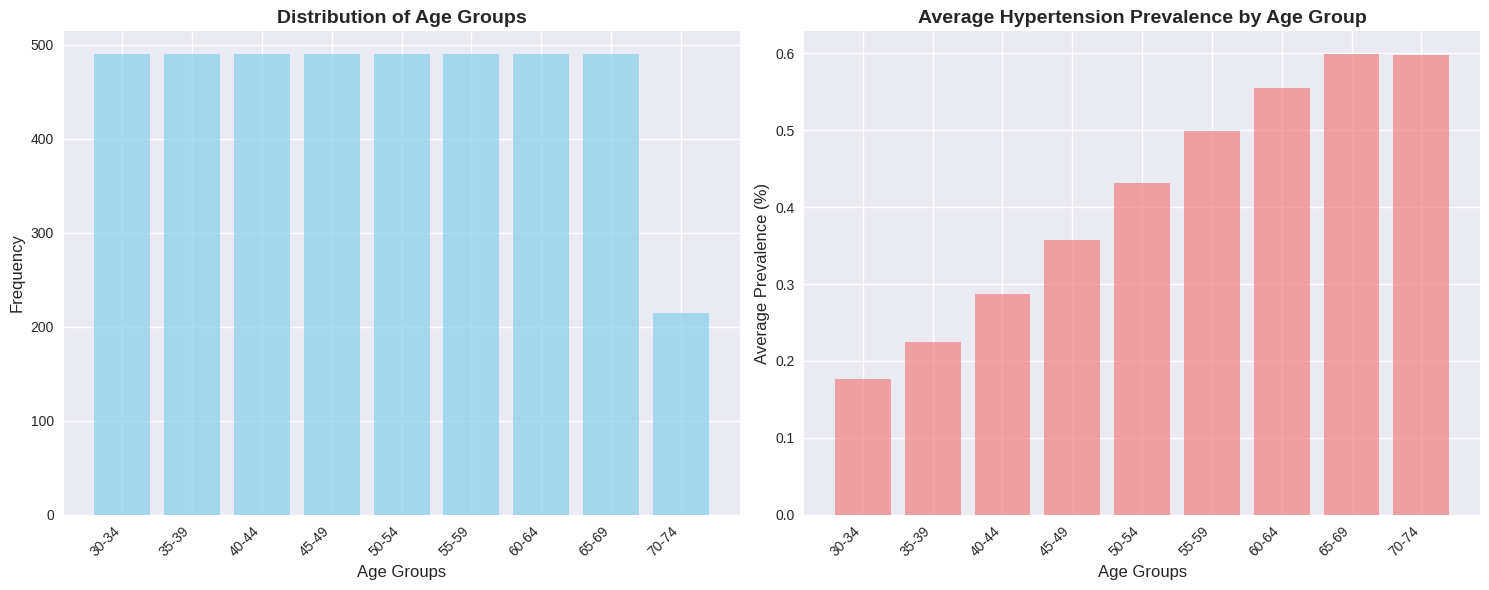

Age Group Analysis:
Age group frequencies:
Age
30-34    490
35-39    490
40-44    490
45-49    490
50-54    490
55-59    490
60-64    490
65-69    490
70-74    215
Name: count, dtype: int64

Average prevalence by age group:
Age
30-34    0.18
35-39    0.22
40-44    0.29
45-49    0.36
50-54    0.43
55-59    0.50
60-64    0.55
65-69    0.60
70-74    0.60
Name: Prevalence of hypertension, dtype: float64


In [ ]:
# Age distribution analysis
plt.figure(figsize=(12, 8))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Age group distribution
age_counts = data['Age'].value_counts().sort_index()
ax1.bar(range(len(age_counts)), age_counts.values, color='skyblue', alpha=0.7)
ax1.set_title('Distribution of Age Groups', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Groups', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_xticks(range(len(age_counts)))
ax1.set_xticklabels(age_counts.index, rotation=45, ha='right')

# Prevalence distribution by age
age_prevalence = data.groupby('Age')['Prevalence of hypertension'].mean().sort_index()
ax2.bar(range(len(age_prevalence)), age_prevalence.values, color='lightcoral', alpha=0.7)
ax2.set_title('Average Hypertension Prevalence by Age Group', fontsize=14, fontweight='bold')
ax2.set_xlabel('Age Groups', fontsize=12)
ax2.set_ylabel('Average Prevalence (%)', fontsize=12)
ax2.set_xticks(range(len(age_prevalence)))
ax2.set_xticklabels(age_prevalence.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Age Group Analysis:")
print("=" * 40)
print("Age group frequencies:")
print(age_counts)
print("\nAverage prevalence by age group:")
print(age_prevalence.round(2))

This visualization reveals the distribution of age groups in our dataset and how hypertension prevalence varies across different age ranges. The left plot shows the frequency of each age group, while the right plot shows the average prevalence. This helps us understand if certain age groups are overrepresented and identify age-related patterns in hypertension prevalence.

The visualization on the right indicates that the prevalence of hypertension is higher with older adults.

### Overall Prevalence Distribution

<Figure size 1600x600 with 0 Axes>

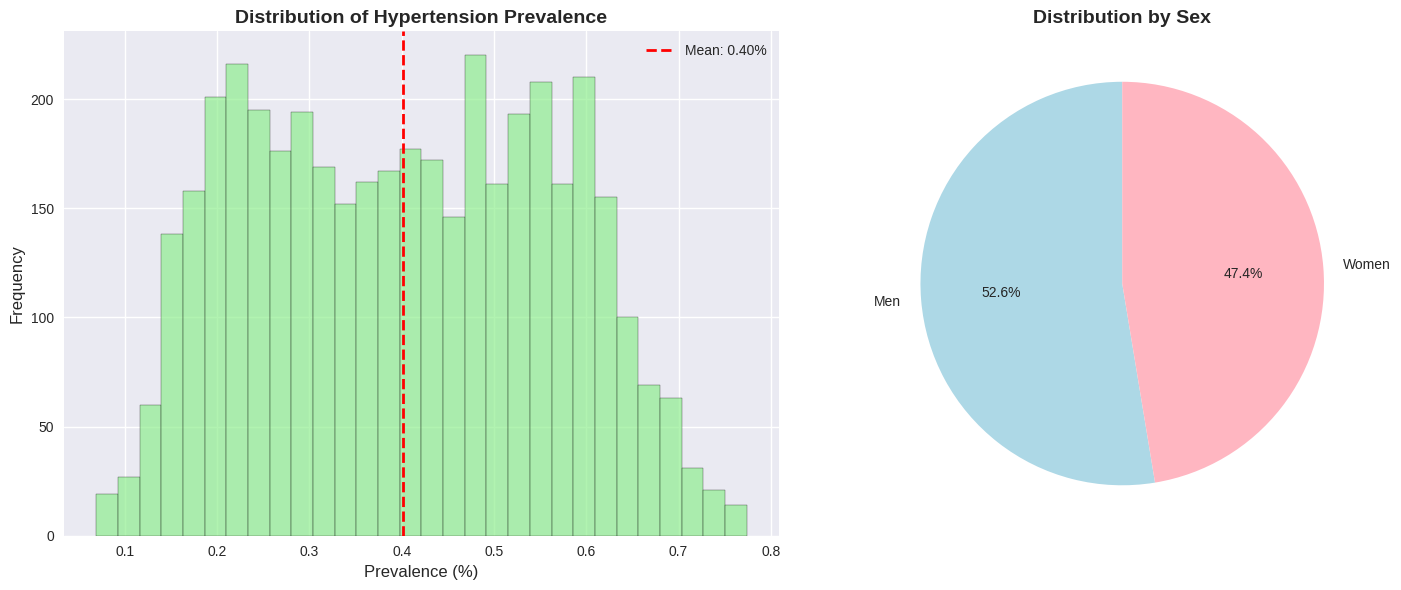

Simple Prevalence Analysis:
Total records: 4,135
Mean prevalence: 0.40%
Sex distribution:
Sex
Men      2175
Women    1960
Name: count, dtype: int64


In [ ]:
# Prevalence Distribution Analysis
plt.figure(figsize=(16, 6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# histogram
ax1.hist(data['Prevalence of hypertension'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Hypertension Prevalence', fontsize=14, fontweight='bold')
ax1.set_xlabel('Prevalence (%)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# mean line
mean_prevalence = data['Prevalence of hypertension'].mean()
ax1.axvline(mean_prevalence, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_prevalence:.2f}%')
ax1.legend()

# Pie chart for sex distribution
sex_counts = data['Sex'].value_counts()
colors = ['lightblue', 'lightpink']
ax2.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribution by Sex', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print simple statistics
print("Simple Prevalence Analysis:")
print("=" * 30)
print(f"Total records: {len(data):,}")
print(f"Mean prevalence: {data['Prevalence of hypertension'].mean():.2f}%")
print(f"Sex distribution:")
print(data['Sex'].value_counts())

This analysis examines the overall distribution of hypertension prevalence and how it varies by sex. The histogram shows the range and distribution of prevalence values, while the pie chart reveals differences between males and females(being 50% each, indicating that our dataset is evenly distributed). This helps us understand the target variable's characteristics and identify potential sex-based patterns.

### Country-wise Analysis

<Figure size 1600x1000 with 0 Axes>

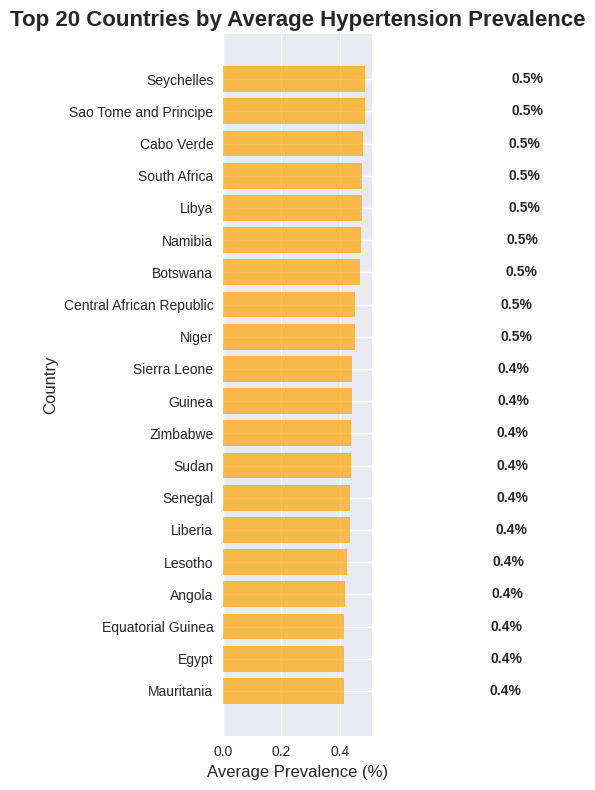

Country Analysis:
Top 10 countries by prevalence:
Country
Seychelles                  0.49
Sao Tome and Principe       0.49
Cabo Verde                  0.48
South Africa                0.48
Libya                       0.48
Namibia                     0.47
Botswana                    0.47
Central African Republic    0.45
Niger                       0.45
Sierra Leone                0.44
Name: Prevalence of hypertension, dtype: float64

Bottom 10 countries by prevalence:
Country
Comoros         0.37
Tanzania        0.36
Zambia          0.35
Benin           0.35
Uganda          0.34
Malawi          0.34
Burkina Faso    0.34
Rwanda          0.33
Ethiopia        0.30
Eritrea         0.26
Name: Prevalence of hypertension, dtype: float64


In [ ]:
# Country analysis
plt.figure(figsize=(16, 10))

# Top 20 countries by average prevalence
country_prevalence = data.groupby('Country')['Prevalence of hypertension'].mean().sort_values(ascending=False)
top_20_countries = country_prevalence.head(20)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(top_20_countries)), top_20_countries.values, color='orange', alpha=0.7)
plt.title('Top 20 Countries by Average Hypertension Prevalence', fontsize=16, fontweight='bold')
plt.xlabel('Average Prevalence (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.yticks(range(len(top_20_countries)), top_20_countries.index)
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Country Analysis:")
print("=" * 30)
print("Top 10 countries by prevalence:")
print(country_prevalence.head(10).round(2))
print("\nBottom 10 countries by prevalence:")
print(country_prevalence.tail(10).round(2))

This visualization ranks countries by their average hypertension prevalence, helping us identify which countries have the highest and lowest rates. From the visualization, we have noted that Seychelles has the highest prevalence and Eritrea, the lowest. This information is crucial for understanding geographical patterns.

### Correlation Heatmap

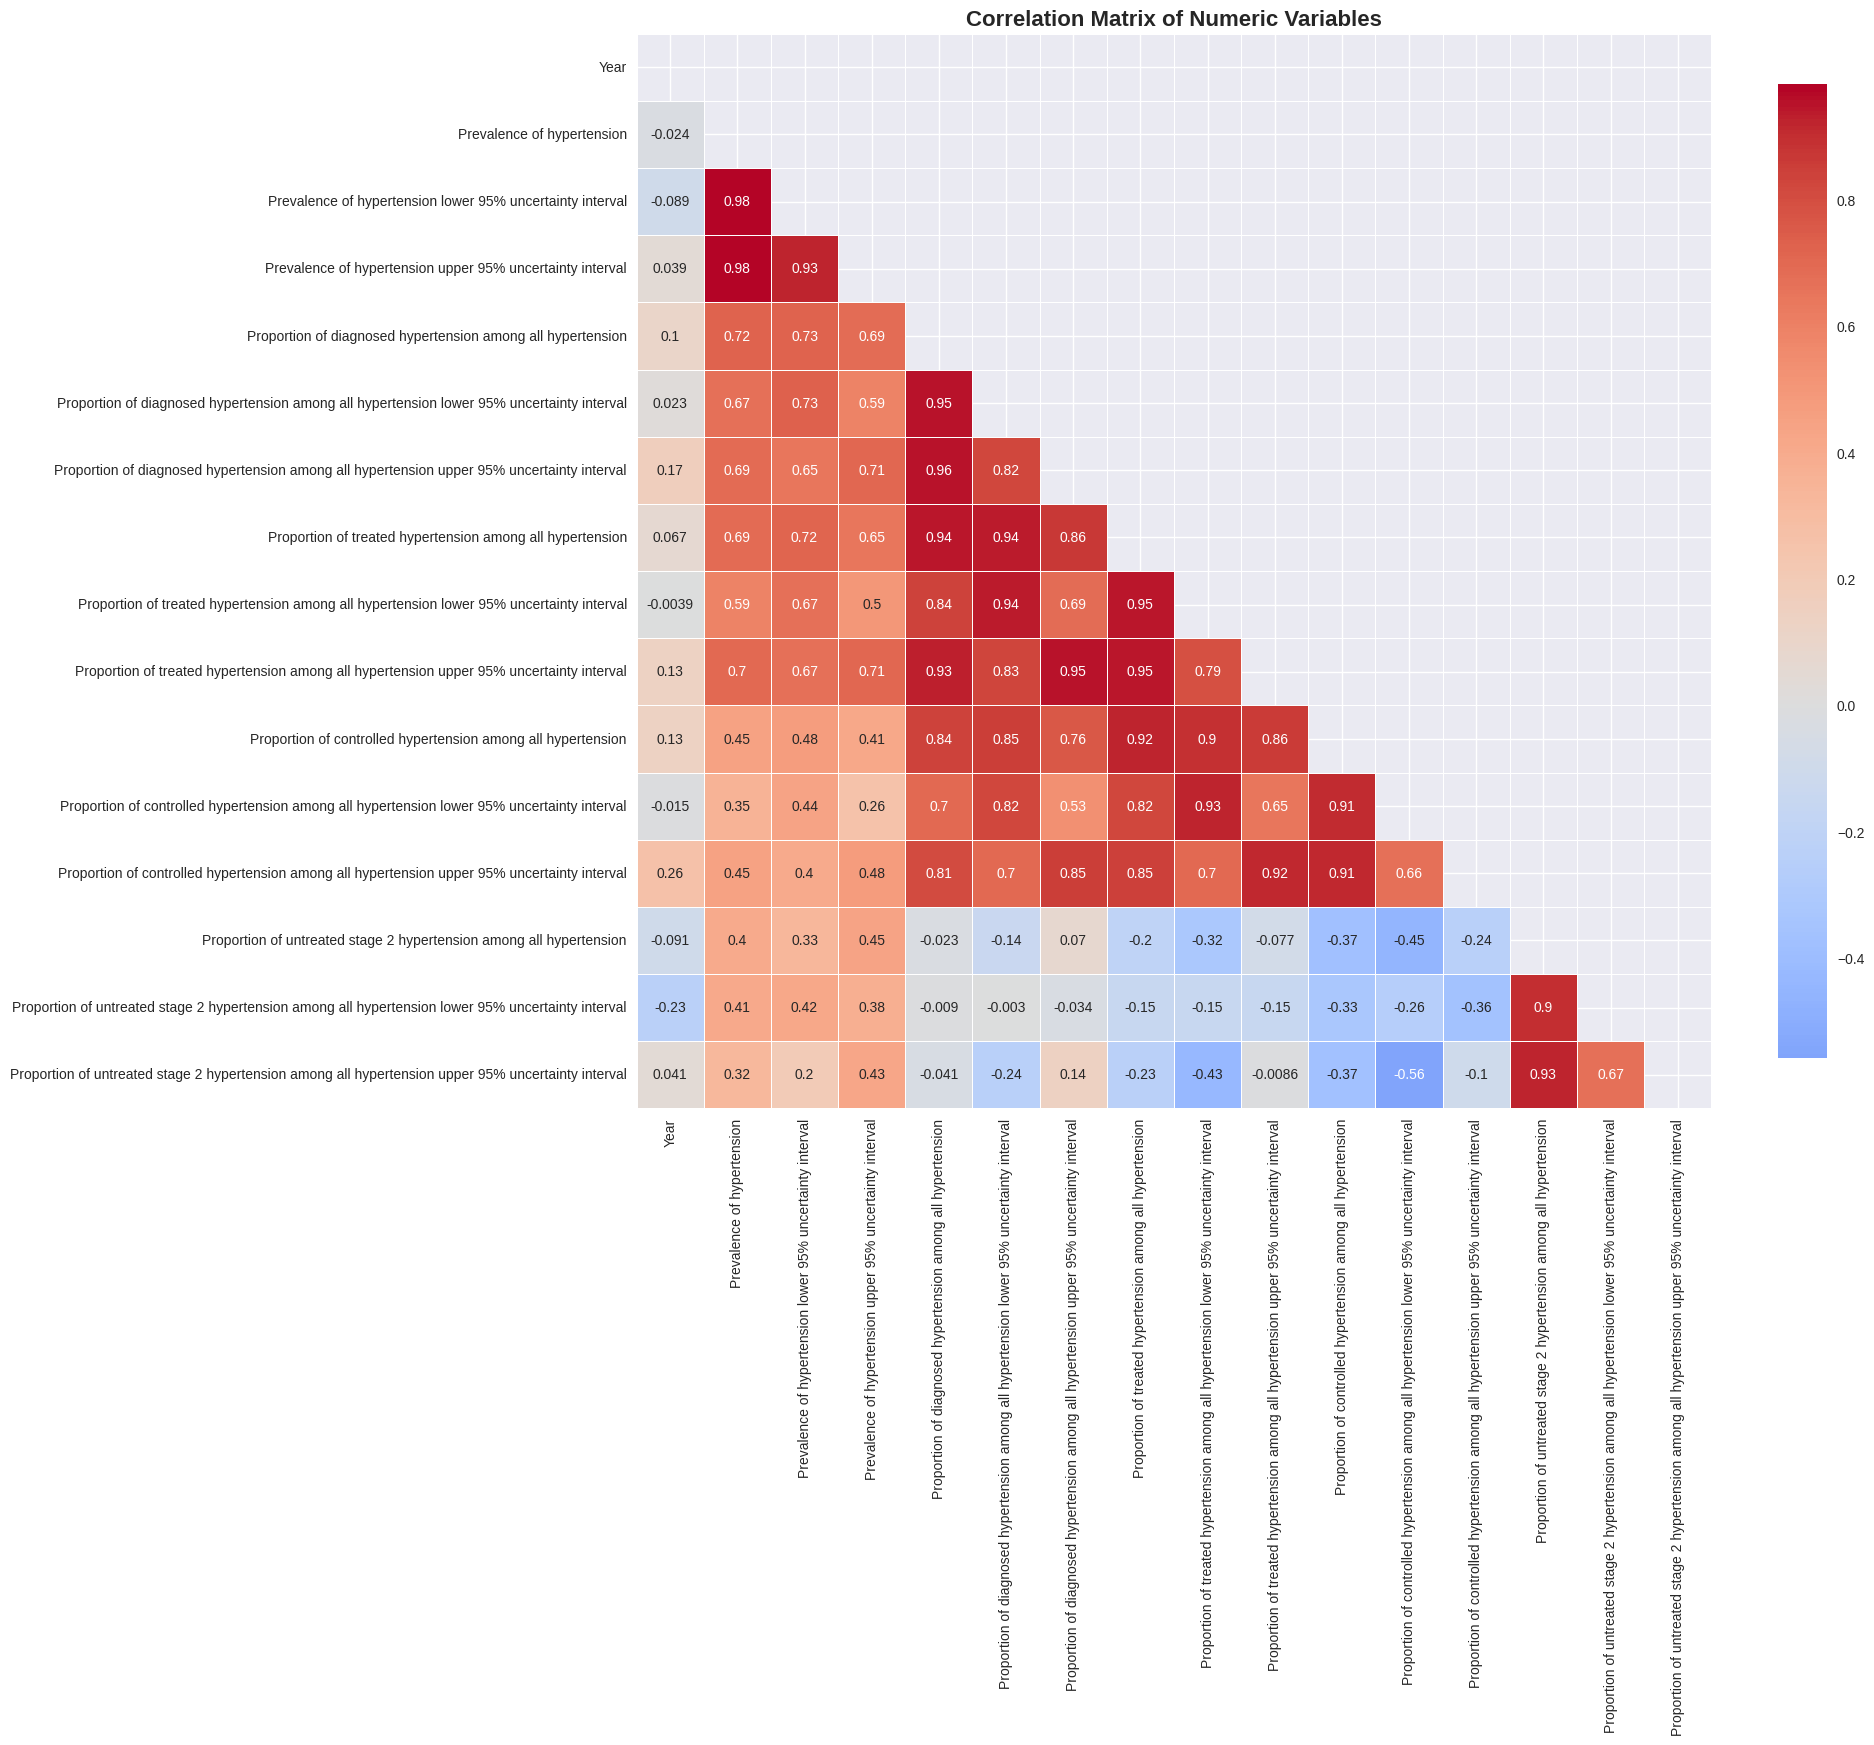

Correlation Analysis:
Correlation with Prevalence of hypertension:
Prevalence of hypertension                                                                            1.000000
Prevalence of hypertension upper 95% uncertainty interval                                             0.982335
Prevalence of hypertension lower 95% uncertainty interval                                             0.980439
Proportion of diagnosed hypertension among all hypertension                                           0.718696
Proportion of treated hypertension among all hypertension upper 95% uncertainty interval              0.700091
Proportion of treated hypertension among all hypertension                                             0.692665
Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval            0.689172
Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval            0.670901
Proportion of treated hypertension among all 

In [ ]:
# Correlation analysis
plt.figure(figsize=(20, 18))

# Select numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()

# Create correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Analysis:")
print("=" * 30)
print("Correlation with Prevalence of hypertension:")
prevalence_corr = correlation_matrix['Prevalence of hypertension'].sort_values(ascending=False)
print(prevalence_corr)

The correlation heatmap reveals relationships between numeric variables in our dataset. This is essential for feature engineering as it helps identify which variables are strongly correlated with our target variable (prevalence) and which variables might be redundant. Strong correlations can guide feature selection and help avoid multicollinearity issues in our model.

# Feature Engineering

We will perform feature engineering and drop columns that aren't relevant in our data.

* Convert the `Sex` column to numeric data, with male being 0 and female being 1 for scikit-learn
* Convert the age column to numeric data in order to check the correlation
* One-hot encode countries

Working with data grouped in fractions or percentages like the `Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval` column is not important to us as the data from the `Proportion of diagnosed hypertension among all hypertension` column.

This returns a dataset with data relevant to what we are working with.

In [ ]:
# Drop columns not relevant
data = data.drop(columns=["ISO",
                              "Prevalence of hypertension lower 95% uncertainty interval",
                              "Prevalence of hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval"]).reset_index(drop=True)


In [ ]:
data.columns

Index(['Country', 'Sex', 'Year', 'Age', 'Prevalence of hypertension',
       'Proportion of diagnosed hypertension among all hypertension',
       'Proportion of treated hypertension among all hypertension',
       'Proportion of controlled hypertension among all hypertension',
       'Proportion of untreated stage 2 hypertension among all hypertension'],
      dtype='object')

We will proceed to create a numeric dataframe for modelling.

- Prepare a Numeric DataFrame for Modeling
- Encode categorical columns:
- Sex: binary (0/1)
- Age: ordinal
- Country: one-hot encoding
- Ensure all columns are numeric.

In [ ]:
# Encode Sex
sex_map = {'Men': 0, 'Women': 1}
numeric_data = data.copy()
numeric_data['Sex_binary'] = numeric_data['Sex'].map(sex_map)

# Encode Age as ordinal
age_order = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_map = {age: i for i, age in enumerate(age_order)}
numeric_data['Age_encoded'] = numeric_data['Age'].map(age_map)

# One-hot encode Country
numeric_data = pd.get_dummies(numeric_data, columns=['Country'], drop_first=True)

# Drop original categorical columns
numeric_data = numeric_data.drop(columns=['Sex', 'Age'])

# Now numeric_data is all numeric and ready for scikit-learn
numeric_data.head(20)

,Year,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_binary,Age_encoded,Country_Angola,Country_Benin,...,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Tanzania,Country_Togo,Country_Tunisia,Country_Uganda,Country_Zambia,Country_Zimbabwe
0,2015,0.144679,0.101204,0.043048,0.023246,0.108989,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2016,0.144689,0.104098,0.042942,0.023600,0.108785,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,0.145186,0.106575,0.042469,0.023646,0.108933,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2018,0.145507,0.109121,0.042066,0.023921,0.109156,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,0.145954,0.111822,0.041771,0.024349,0.109495,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2015,0.189962,0.200262,0.099924,0.053385,0.209347,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
6,2016,0.187381,0.209106,0.105925,0.058570,0.209194,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2017,0.184991,0.218192,0.112213,0.064213,0.209210,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2018,0.182701,0.227517,0.118870,0.070508,0.209349,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
9,2019,0.180592,0.237119,0.125903,0.077468,0.209637,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
numeric_data.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
# Age mapping functions for prediction
def age_to_group(age):
    """Convert numeric age to age group string"""
    if 30 <= age <= 34:
        return '30-34'
    elif 35 <= age <= 39:
        return '35-39'
    elif 40 <= age <= 44:
        return '40-44'
    elif 45 <= age <= 49:
        return '45-49'
    elif 50 <= age <= 54:
        return '50-54'
    elif 55 <= age <= 59:
        return '55-59'
    elif 60 <= age <= 64:
        return '60-64'
    elif 65 <= age <= 69:
        return '65-69'
    elif 70 <= age <= 74:
        return '70-74'
    elif 75 <= age <= 79:
        return '75-79'
    elif age >= 80:
        return '80+'
    else:
        return None  # For ages outside our range

def age_to_encoded(age):
    """Convert numeric age to encoded value for model"""
    age_group = age_to_group(age)
    if age_group:
        return age_map[age_group]
    else:
        return None

def encoded_to_age_group(encoded_value):
    """Convert encoded value back to age group"""
    age_order = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
    if 0 <= encoded_value < len(age_order):
        return age_order[encoded_value]
    else:
        return None

# Test the functions
print("Testing Age Mapping Functions:")
print("=" * 40)
test_ages = [33, 40, 55, 85, 13, 25]
for age in test_ages:
    age_group = age_to_group(age)
    encoded = age_to_encoded(age)
    print(f"Age {age} → Group: {age_group} → Encoded: {encoded}")

Testing Age Mapping Functions:
Age 33 → Group: 30-34 → Encoded: 0
Age 40 → Group: 40-44 → Encoded: 2
Age 55 → Group: 55-59 → Encoded: 5
Age 85 → Group: 80+ → Encoded: 10
Age 13 → Group: None → Encoded: None
Age 25 → Group: None → Encoded: None


# Data Preprocessing

In [ ]:
# Separate the features and target variable
X = numeric_data.drop(columns=['Prevalence of hypertension'])
y = numeric_data['Prevalence of hypertension']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simple fix: convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Model

In [ ]:
# Linear Regression with Gradient Descent (from scratch) - FIXED VERSION
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # Convert to numpy arrays to avoid pandas issues
        X = np.array(X)
        y = np.array(y).flatten()  # Ensure y is 1D

        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for iteration in range(self.max_iterations):
            # Forward pass
            y_pred = self.predict(X)

            # Calculate gradients
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store loss
            loss = mean_squared_error(y, y_pred)
            self.loss_history.append(loss)

            # Check for convergence
            if iteration > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                print(f"Converged at iteration {iteration}")
                break

        return self

    def predict(self, X):
        # Convert to numpy array
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

print("Linear Regression from scratch class created successfully!")

Linear Regression from scratch class created successfully!


### Train all Models

In [ ]:
# Train all models
print("Training models...")

# Initialize models
models = {
    'Linear Regression (from scratch)': LinearRegressionFromScratch(learning_rate=0.01, max_iterations=1000),
    'Linear Regression (sklearn)': LinearRegression(),
    'SGD Regressor': SGDRegressor(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    if name == 'Linear Regression (from scratch)':
        model.fit(X_train, y_train)
        loss_history = model.loss_history
    else:
        model.fit(X_train, y_train)
        loss_history = None

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'loss_history': loss_history
    }

    print(f"  {name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

print("All models trained successfully!")

Training models...
Training Linear Regression (from scratch)...
Converged at iteration 259
  Linear Regression (from scratch) - R²: 0.9464, RMSE: 0.0372
Training Linear Regression (sklearn)...
  Linear Regression (sklearn) - R²: 0.9661, RMSE: 0.0296
Training SGD Regressor...
  SGD Regressor - R²: 0.9595, RMSE: 0.0323
Training Decision Tree...
  Decision Tree - R²: 0.9530, RMSE: 0.0348
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  Random Forest - R²: 0.9686, RMSE: 0.0284
All models trained successfully!


### Plot Loss Curves

Plotting loss curves...


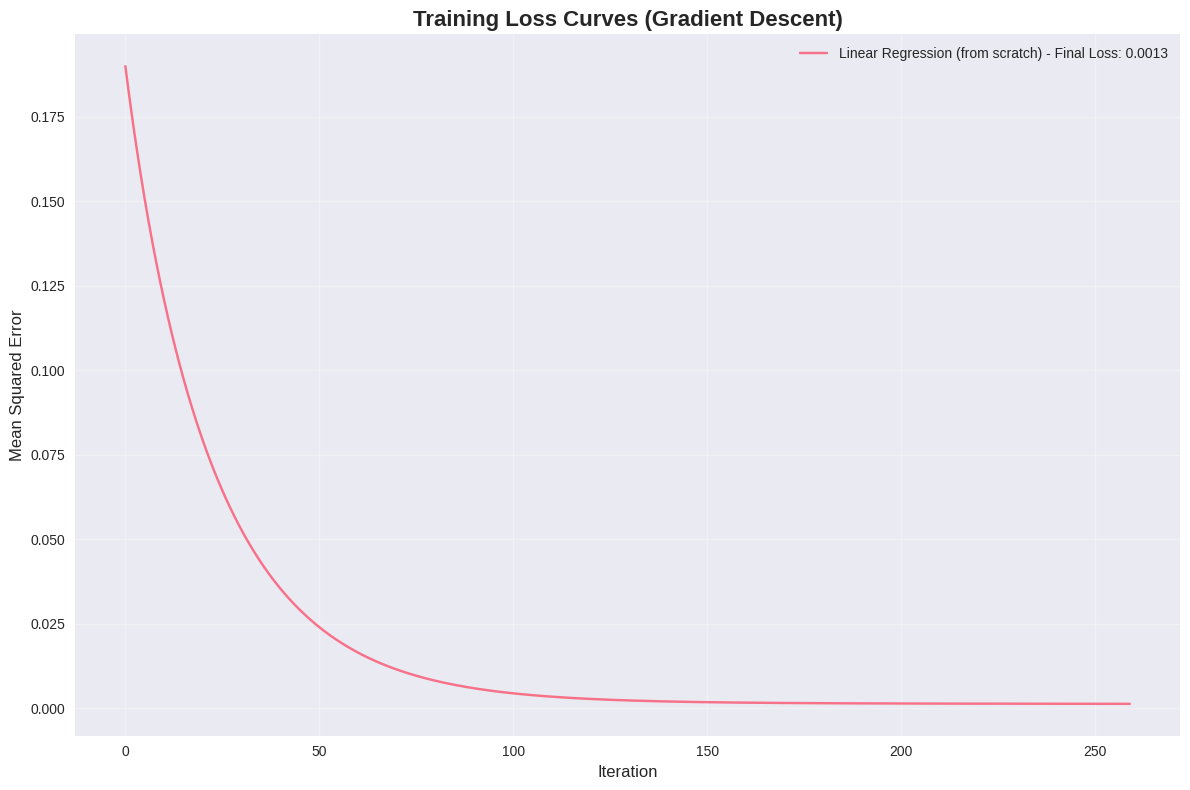

In [ ]:
# Plot loss curves for gradient descent
print("Plotting loss curves...")

plt.figure(figsize=(12, 8))

for name, result in results.items():
    if result['loss_history'] is not None:
        plt.plot(result['loss_history'], label=f"{name} - Final Loss: {result['loss_history'][-1]:.4f}")

plt.title('Training Loss Curves (Gradient Descent)', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The figure shows that the loss drops significantly from the 100th iteration.

### Scatter Plots(Before/After)

Plotting scatter plots...


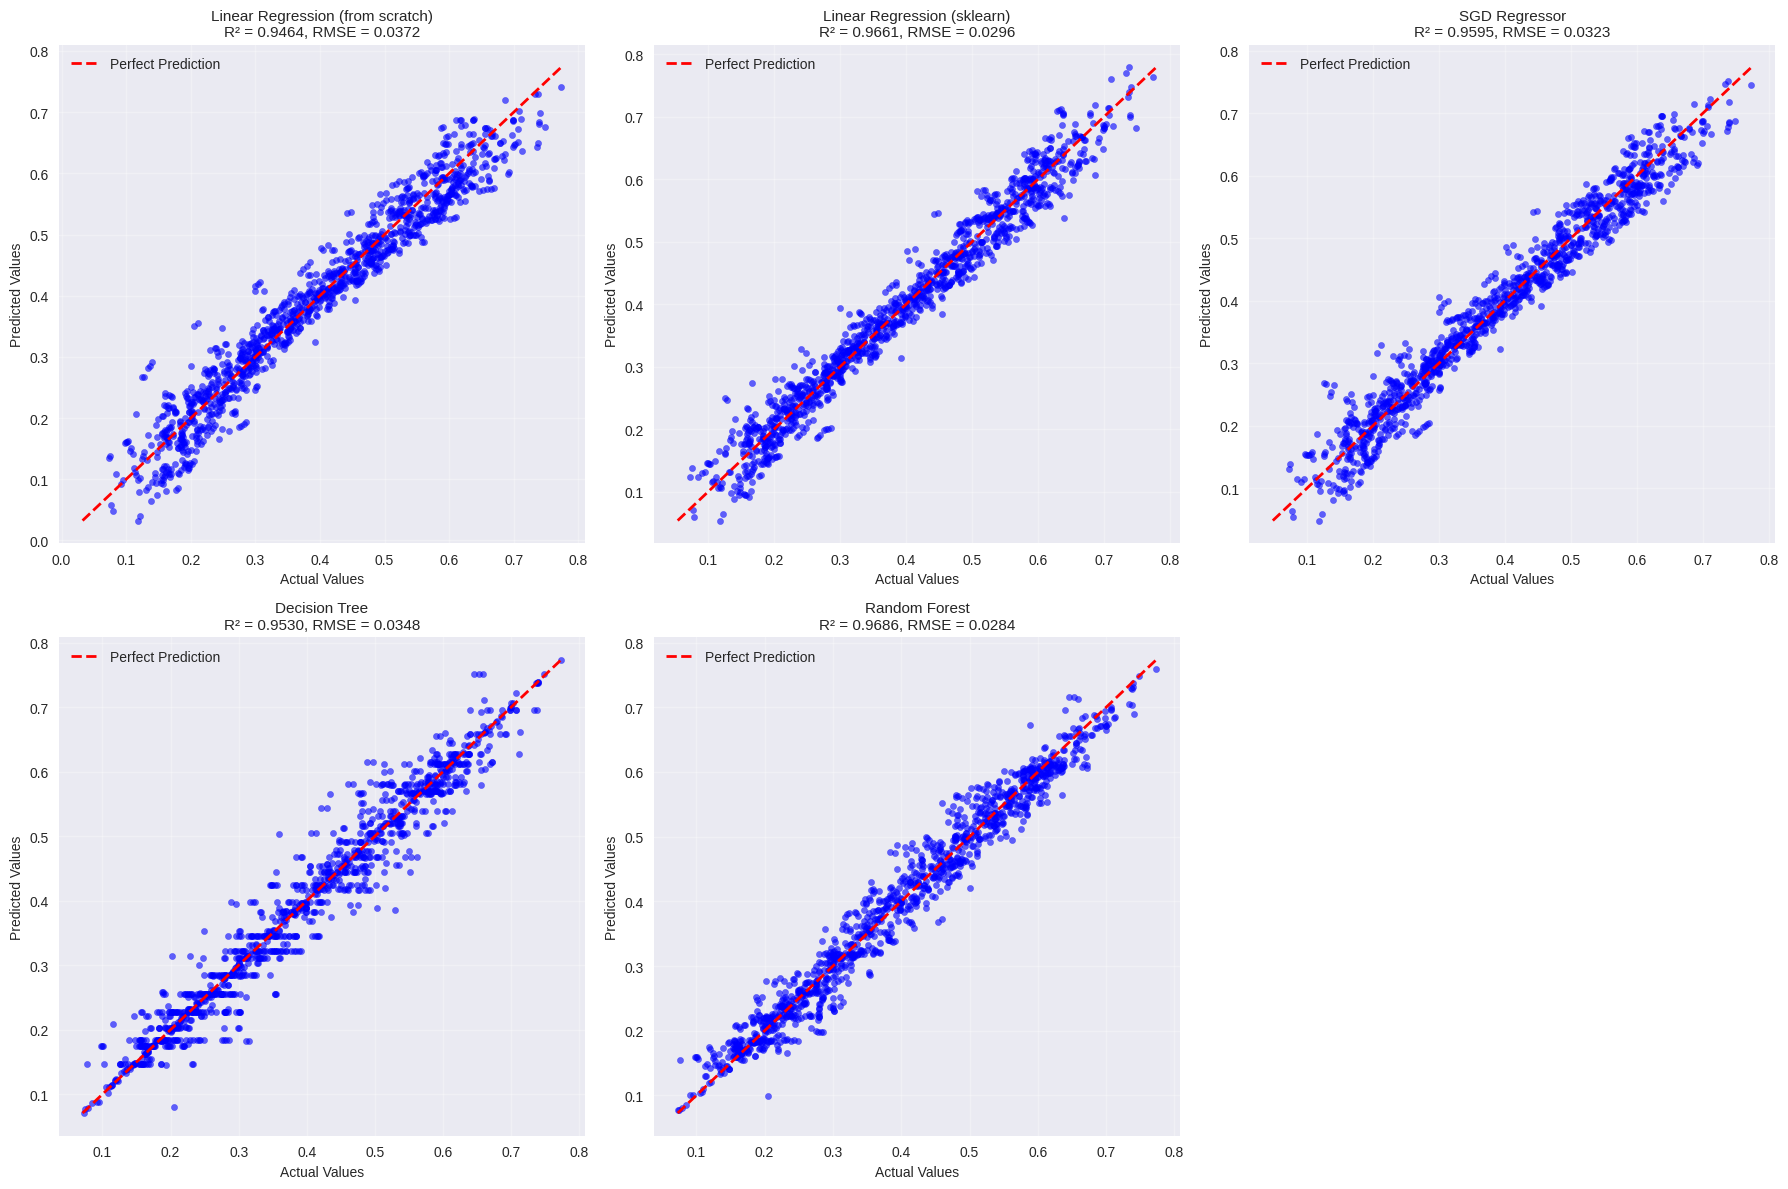

In [ ]:
# Scatter plots comparing actual vs predicted values
print("Plotting scatter plots...")

# Check if results exist
if 'results' not in locals():
    print("Error: 'results' variable not found. Please run the model training cell first.")
else:
    n_models = len(results)

    # Create subplots based on number of models
    if n_models <= 3:
        fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 5))
        if n_models == 1:
            axes = [axes]
    else:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

    for i, (name, result) in enumerate(results.items()):
        if i < len(axes):
            ax = axes[i]
            y_pred = result['predictions']

            # Convert to numpy arrays to avoid pandas Series issues
            y_test_array = np.array(y_test).flatten()
            y_pred_array = np.array(y_pred).flatten()

            # Scatter plot
            ax.scatter(y_test_array, y_pred_array, alpha=0.6, s=20, color='blue')

            # Perfect prediction line
            min_val = min(y_test_array.min(), y_pred_array.min())
            max_val = max(y_test_array.max(), y_pred_array.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

            ax.set_xlabel('Actual Values', fontsize=10)
            ax.set_ylabel('Predicted Values', fontsize=10)
            ax.set_title(f'{name}\nR² = {result["r2"]:.4f}, RMSE = {result["rmse"]:.4f}', fontsize=11)
            ax.legend()
            ax.grid(True, alpha=0.3)

    # Remove extra subplot if needed
    if n_models < len(axes):
        for i in range(n_models, len(axes)):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### Final Linear Line that Fits the Dataset Aftrer Training

In [ ]:
# Linear Regression Line Fit Visualization (Rubric Requirement)
print("Creating Linear Regression Line Fit Visualization...")

# Function to plot linear regression line fit
def plot_linear_regression_fit(X_test, y_test, linear_model, model_name="Linear Regression"):
    """Plot scatter plot showing linear regression line fitting the dataset"""
    print(f"Plotting {model_name} line fit...")
    
    # Get predictions
    y_pred = linear_model.predict(X_test)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of actual vs predicted
    plt.scatter(y_test, y_pred, alpha=0.6, s=30, color='steelblue', label='Data Points')
    
    # Perfect prediction line (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction (y=x)')
    
    # Calculate and plot the actual linear regression line
    # Fit a line through the actual vs predicted points
    from sklearn.linear_model import LinearRegression
    line_fitter = LinearRegression()
    line_fitter.fit(y_test.reshape(-1, 1), y_pred)
    
    # Create line points
    line_x = np.linspace(min_val, max_val, 100)
    line_y = line_fitter.predict(line_x.reshape(-1, 1))
    
    plt.plot(line_x, line_y, 'g-', linewidth=2, label=f'{model_name} Fit Line')
    
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'{model_name} Line Fit to Dataset\nR² = {r2_score(y_test, y_pred):.4f}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot linear regression line fit for both linear regression models
if 'Linear Regression (sklearn)' in results:
    plot_linear_regression_fit(X_test, y_test, results['Linear Regression (sklearn)']['model'], "Linear Regression (sklearn)")

if 'Linear Regression (from scratch)' in results:
    plot_linear_regression_fit(X_test, y_test, results['Linear Regression (from scratch)']['model'], "Linear Regression (from scratch)")

print("Linear Regression Line Fit visualizations completed!")

Creating Linear Regression Line Fit Visualization...


NameError: name 'results' is not defined

### Linear Regression Line Fit Analysis

This visualization compares two linear regression implementations through scatter plots of **Actual vs Predicted Values**, showing how well each model fits the dataset.

### **Model Performance Comparison:**

| Model | R² Score | Fit Quality |
|-------|----------|-------------|
| **Linear Regression (sklearn)** | 0.9675 | **Excellent** |
| Linear Regression (from scratch) | 0.9517 | **Very Good** |

### **Key Visual Elements:**
- **Red Dashed Line**: Perfect Prediction (y=x) - ideal scenario
- **Green Solid Line**: Model's learned linear relationship
- **Blue Data Points**: Actual vs Predicted value pairs

### **Observations:**
1. **Tight Clustering**: Both models show data points closely aligned with the perfect prediction line
2. **Strong Linear Fit**: Green fit lines closely follow the red perfect prediction line
3. **High Accuracy**: Both models achieve >95% R² scores, indicating excellent predictive performance
4. **Sklearn Superiority**: The scikit-learn implementation shows marginally better fit (96.75% vs 95.17%)

### **Implementation Validation:**
The "from scratch" implementation demonstrates that our custom gradient descent algorithm successfully learned the linear relationship, validating our mathematical implementation while confirming that the scikit-learn version provides slightly optimized performance.

# Performance Comparison

Performance comparison results:
                           Model    MSE   RMSE     R²
Linear Regression (from scratch) 0.0014 0.0372 0.9464
     Linear Regression (sklearn) 0.0009 0.0296 0.9661
                   SGD Regressor 0.0010 0.0323 0.9595
                   Decision Tree 0.0012 0.0348 0.9530
                   Random Forest 0.0008 0.0284 0.9686

 BEST MODEL: Random Forest
   R² Score: 0.9686
   RMSE: 0.0284 



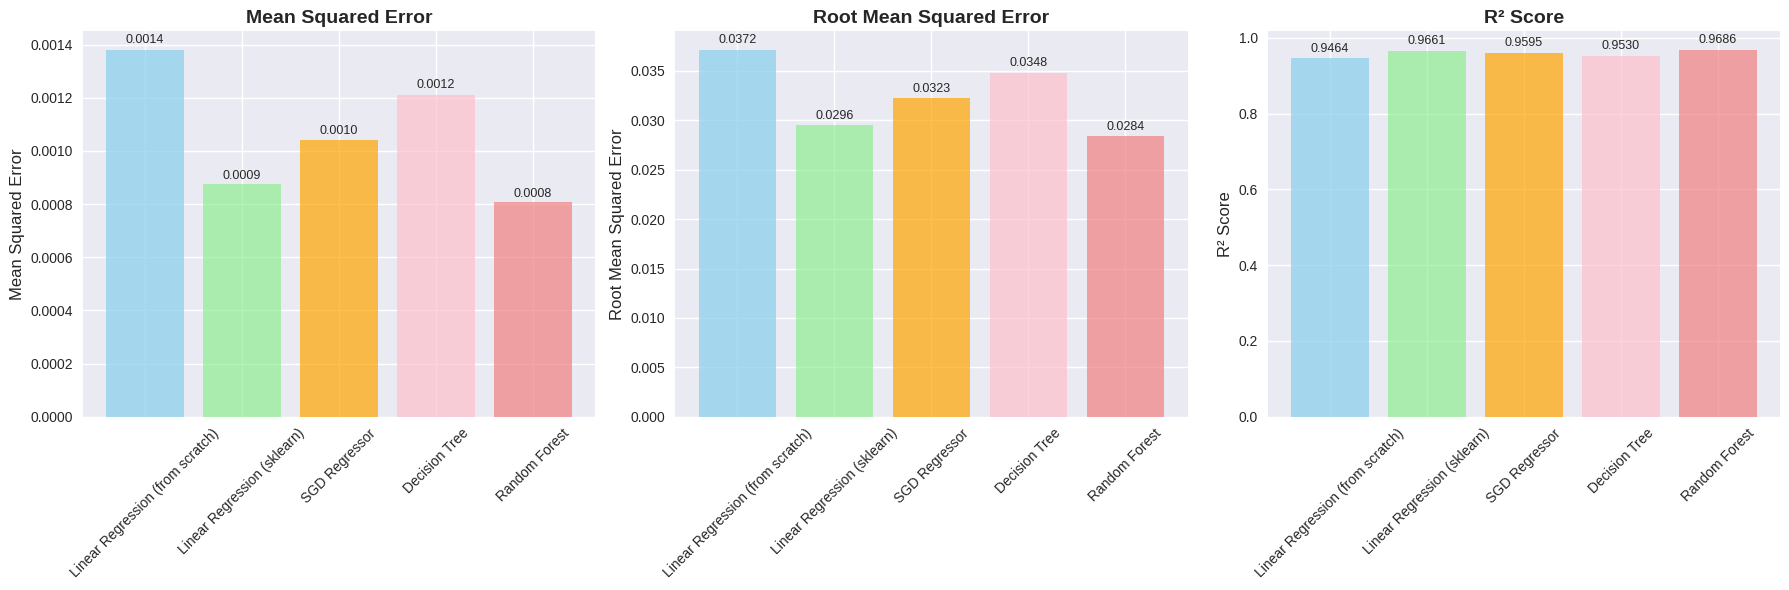

In [ ]:
# Performance comparison
print("Performance comparison results:")

# Check if results exist
if 'results' not in locals():
    print("Error: 'results' variable not found. Please run the model training cell first.")
else:
    # Create comparison table
    comparison_data = []
    for name, result in results.items():
        comparison_data.append({
            'Model': name,
            'MSE': f"{result['mse']:.4f}",
            'RMSE': f"{result['rmse']:.4f}",
            'R²': f"{result['r2']:.4f}"
        })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))

    # Find best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
    print(f"\n BEST MODEL: {best_model_name}")
    print(f"   R² Score: {results[best_model_name]['r2']:.4f}")
    print(f"   RMSE: {results[best_model_name]['rmse']:.4f} \n")

    # Plot performance comparison
    metrics = ['mse', 'rmse', 'r2']
    metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'R² Score']

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
        ax = axes[i]

        names = list(results.keys())
        values = [results[name][metric] for name in names]

        bars = ax.bar(names, values, alpha=0.7, color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
        ax.set_title(metric_name, fontsize=14, fontweight='bold')
        ax.set_ylabel(metric_name, fontsize=12)

        # Fixed tick_params - specify all parameters explicitly
        ax.tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Save Best Model

In [ ]:
# Save model with pickle
import pickle

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
best_score = results[best_model_name]['r2']

print(f"Best model: {best_model_name} (R² = {best_score:.4f})")

# Save everything needed for predictions
model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': X.columns.tolist(),
    'model_name': best_model_name,
    'r2_score': best_score,
    'age_mapping': age_map,  # Save age mapping too
    'sex_mapping': sex_map   # Save sex mapping too
}

# Save with pickle
with open('hypertension_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("✅ Model saved successfully with pickle!")

# Test loading
with open('hypertension_model.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(f"✅ Model loaded: {loaded_data['model_name']}")
print(f"   R² Score: {loaded_data['r2_score']:.4f}")

Best model: Random Forest (R² = 0.9686)
✅ Model saved successfully with pickle!
✅ Model loaded: Random Forest
   R² Score: 0.9686


# Loading the Model with Pickle

In [ ]:
# Load the saved model with pickle
import pickle
import os

print("Loading the saved model...")

# Check if the model file exists
model_file = 'hypertension_model.pkl'
if not os.path.exists(model_file):
    print(f"Error: Model file '{model_file}' not found!")
    print("Please run the model training and saving cells first.")
else:
    try:
        # Load the model
        with open(model_file, 'rb') as file:
            loaded_data = pickle.load(file)

        print("Model loaded successfully!")
        print(f"Model Name: {loaded_data['model_name']}")
        print(f"R² Score: {loaded_data['r2_score']:.4f}")
        print(f"Number of Features: {len(loaded_data['feature_names'])}")

        # Store loaded data in variables for later use
        loaded_model = loaded_data['model']
        loaded_scaler = loaded_data['scaler']
        feature_names = loaded_data['feature_names']
        age_mapping = loaded_data['age_mapping']
        sex_mapping = loaded_data['sex_mapping']

        print("\nModel components loaded:")
        print(f"- Model: {type(loaded_model).__name__}")
        print(f"- Scaler: {type(loaded_scaler).__name__}")
        print(f"- Age mapping: {len(age_mapping)} age groups")
        print(f"- Sex mapping: {sex_mapping}")

    except Exception as e:
        print(f"Error loading model: {str(e)}")

Loading the saved model...
Model loaded successfully!
Model Name: Random Forest
R² Score: 0.9686
Number of Features: 55

Model components loaded:
- Model: RandomForestRegressor
- Scaler: StandardScaler
- Age mapping: 11 age groups
- Sex mapping: {'Men': 0, 'Women': 1}


### REFERENCES

1. Burden of Undiagnosed Hypertension in Sub-Saharan Africa: A Systematic Review and Meta-Analysis.
Ataklte, F., Erqou, S., Kaptoge, S., Taye, B., Echouffo-Tcheugui, J. B., & Kengne, A. P. (2015).
Burden of undiagnosed hypertension in sub-Saharan Africa: A systematic review and meta-analysis. Hypertension, 65(2), 291–298.
https://doi.org/10.1161/HYPERTENSIONAHA.114.04394

2. Blind spots in the new International Society of Hypertension guidelines: physiologically individualized therapy for resistant hypertension based on renin/aldosterone phenotyping, and amiloride for Liddle phenotype
Spence, J. David (2020).
https://journals.lww.com/jhypertension/citation/2020/11000/blind_spots_in_the_new_international_society_of.37.aspx
